In [111]:
import json

In [112]:
#### Visualizing Results for ImageNet

In [166]:
with open('./results/vision_only_from_start_with_attention.json') as f:
    data = json.load(f)

In [167]:
compression_ratios = []
for curr_ratio in data:
    compression_ratios.append(curr_ratio)

In [168]:
n_layers = [str(x) for x in range(1,10)]

In [169]:
n_layers

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [170]:
performanceDictTop1 = dict()
performanceDictTop5 = dict()
for ratio in compression_ratios:
    performanceDictTop1[ratio]=[]
    performanceDictTop5[ratio]=[]
    for layer in n_layers:
        performanceDictTop1[ratio].append(data[ratio][layer]['perf']['top-1'])
        performanceDictTop5[ratio].append(data[ratio][layer]['perf']['top-5'])

In [171]:
import matplotlib.pyplot as plt

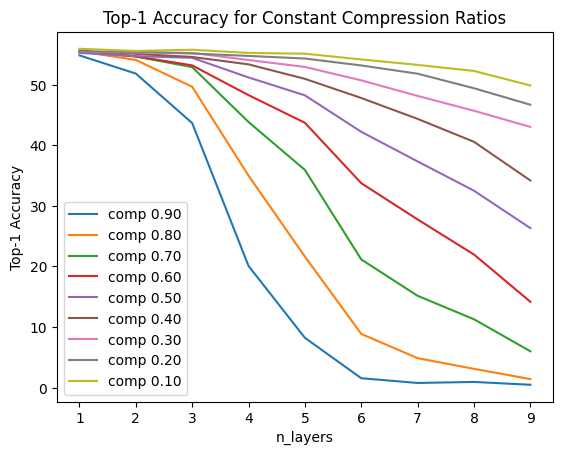

In [172]:
for ratio in compression_ratios:
    plt.plot(n_layers, performanceDictTop1[ratio], label='comp {:.2f}'.format(1-float(ratio)))
plt.xlabel('n_layers')
plt.ylabel('Top-1 Accuracy')

plt.title('Top-1 Accuracy for Constant Compression Ratios')

plt.legend()

plt.show()

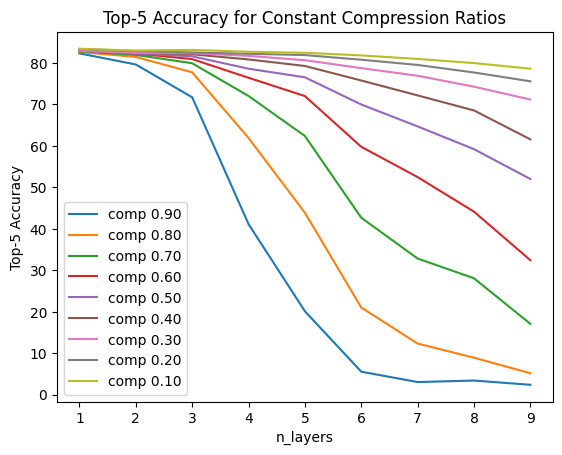

In [173]:
for ratio in compression_ratios:
    plt.plot(n_layers, performanceDictTop5[ratio], label='comp {:.2f}'.format(1-float(ratio)))
plt.xlabel('n_layers')
plt.ylabel('Top-5 Accuracy')

plt.title('Top-5 Accuracy for Constant Compression Ratios')

plt.legend()

plt.show()

In [174]:
performanceDictConstNTop1=dict()
performanceDictConstNTop5 = dict()
for layer in n_layers:
    performanceDictConstNTop1[layer]=[]
    performanceDictConstNTop5[layer]=[]
    for ratio in compression_ratios:
        performanceDictConstNTop1[layer].append(data[ratio][layer]['perf']['top-1'])
        performanceDictConstNTop5[layer].append(data[ratio][layer]['perf']['top-5'])

In [175]:

compression_ratios_formatted = ["{:.2f}".format((1-float(x))) for x in compression_ratios]
print(compression_ratios_formatted)
    


['0.90', '0.80', '0.70', '0.60', '0.50', '0.40', '0.30', '0.20', '0.10']


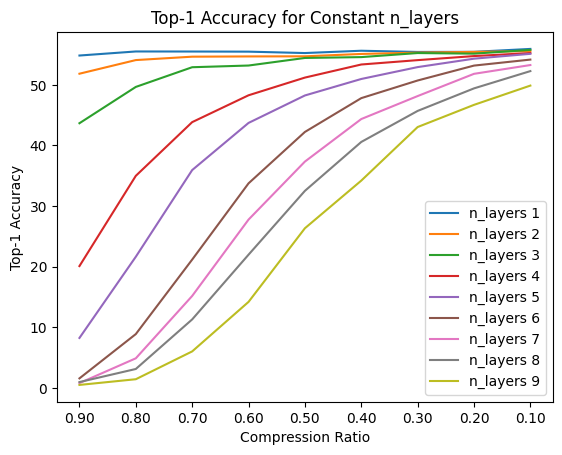

In [176]:
for layer in n_layers:
    plt.plot(compression_ratios_formatted, performanceDictConstNTop1[layer], label='n_layers {}'.format(layer))
plt.xlabel('Compression Ratio')
plt.ylabel('Top-1 Accuracy')

plt.title('Top-1 Accuracy for Constant n_layers')

plt.legend()

plt.show()

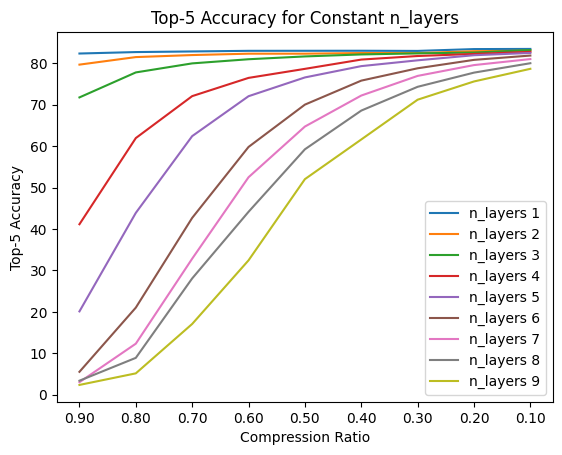

In [177]:
for layer in n_layers:
    plt.plot(compression_ratios_formatted, performanceDictConstNTop5[layer], label='n_layers {}'.format(layer))
plt.xlabel('Compression Ratio')
plt.ylabel('Top-5 Accuracy')

plt.title('Top-5 Accuracy for Constant n_layers')

plt.legend()

plt.show()

In [145]:
#### Visualizing results for CIFAR100

In [178]:
with open('./results/vision_only_from_start_with_attention_CIFAR.json') as f:
    data = json.load(f)

In [179]:
compression_ratios = []
for curr_ratio in data:
    compression_ratios.append(curr_ratio)

In [180]:
n_layers = [str(x) for x in range(1,10)]

In [181]:
performanceDictTop1 = dict()
performanceDictTop5 = dict()
for ratio in compression_ratios:
    performanceDictTop1[ratio]=[]
    performanceDictTop5[ratio]=[]
    for layer in n_layers:
        performanceDictTop1[ratio].append(data[ratio][layer]['perf']['top-1'])
        performanceDictTop5[ratio].append(data[ratio][layer]['perf']['top-5'])

In [182]:
import matplotlib.pyplot as plt

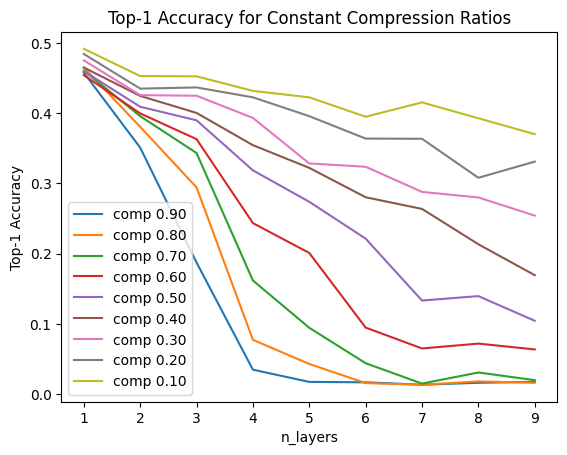

In [183]:
for ratio in compression_ratios:
    plt.plot(n_layers, performanceDictTop1[ratio], label='comp {:.2f}'.format(1-float(ratio)))
plt.xlabel('n_layers')
plt.ylabel('Top-1 Accuracy')

plt.title('Top-1 Accuracy for Constant Compression Ratios')

plt.legend()

plt.show()

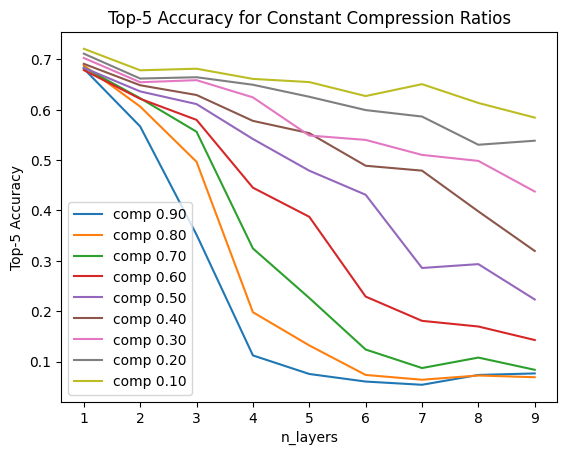

In [184]:
for ratio in compression_ratios:
    plt.plot(n_layers, performanceDictTop5[ratio], label='comp {:.2f}'.format(1-float(ratio)))
plt.xlabel('n_layers')
plt.ylabel('Top-5 Accuracy')

plt.title('Top-5 Accuracy for Constant Compression Ratios')

plt.legend()

plt.show()

In [185]:
performanceDictConstNTop1=dict()
performanceDictConstNTop5 = dict()
for layer in n_layers:
    performanceDictConstNTop1[layer]=[]
    performanceDictConstNTop5[layer]=[]
    for ratio in compression_ratios:
        performanceDictConstNTop1[layer].append(data[ratio][layer]['perf']['top-1'])
        performanceDictConstNTop5[layer].append(data[ratio][layer]['perf']['top-5'])

In [186]:

compression_ratios_formatted = ["{:.2f}".format((1-float(x))) for x in compression_ratios]
print(compression_ratios_formatted)
    


['0.90', '0.80', '0.70', '0.60', '0.50', '0.40', '0.30', '0.20', '0.10']


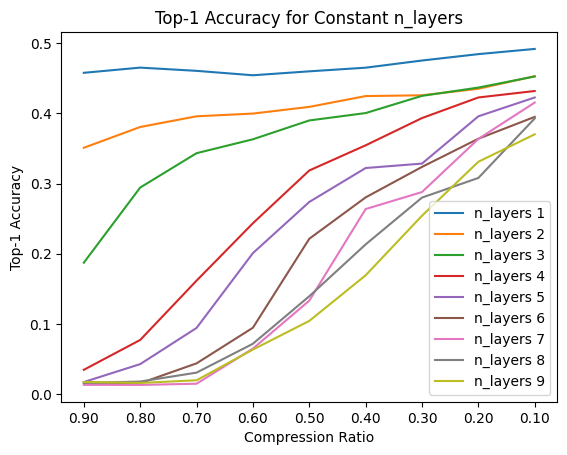

In [187]:
for layer in n_layers:
    plt.plot(compression_ratios_formatted, performanceDictConstNTop1[layer], label='n_layers {}'.format(layer))
plt.xlabel('Compression Ratio')
plt.ylabel('Top-1 Accuracy')

plt.title('Top-1 Accuracy for Constant n_layers')

plt.legend()

plt.show()

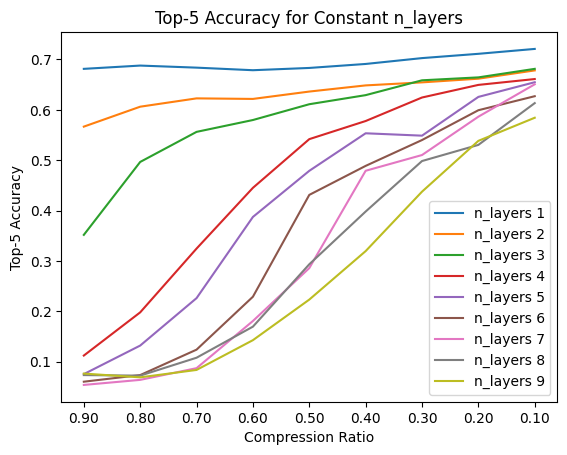

In [188]:
for layer in n_layers:
    plt.plot(compression_ratios_formatted, performanceDictConstNTop5[layer], label='n_layers {}'.format(layer))
plt.xlabel('Compression Ratio')
plt.ylabel('Top-5 Accuracy')

plt.title('Top-5 Accuracy for Constant n_layers')

plt.legend()

plt.show()

In [264]:
import numpy as np

In [265]:
#### Visualizing Results for ImageNet without Attention

with open('./results/vision_only_from_start_without_attention.json') as f:
    data = json.load(f)

In [266]:
def scale_data(inp):
    new_inp = [(x-min(inp)/(max(inp)-min(inp)))*100 for x in inp]
    return new_inp

In [267]:
compression_ratios = []
for curr_ratio in data:
    compression_ratios.append(curr_ratio)

In [268]:
accuracies = []
timetaken = []
# For compression of 10%
n_layers=[]
for layer in data['0.9']:
    n_layers.append(layer)
    accuracies.append(data['0.9'][layer]['perf']['top-5'])
    timetaken.append(data['0.9'][layer]['perf']['text_enc_time'])

In [269]:
n_layers_formatted=[int(x) for x in n_layers]
accuracies_formatted=[float(x) for x in accuracies]
timetaken_formatted=[float(x) for x in timetaken]

In [270]:
timetaken_formatted2 = []
for x in timetaken_formatted:
    scaled_time=((x-min(timetaken_formatted))/(max(timetaken_formatted)-min(timetaken_formatted)))*100
    timetaken_formatted2.append(scaled_time)

In [271]:
timetaken_formatted2 = np.array(timetaken_formatted2)
accuracies_formatted =np.array(accuracies_formatted)
n_layers_formatted = np.array(n_layers_formatted)

In [272]:
timetaken_formatted2

array([100.        ,  83.65262931,  62.14442849,  39.46265435,
        18.5866352 ,   0.        ])

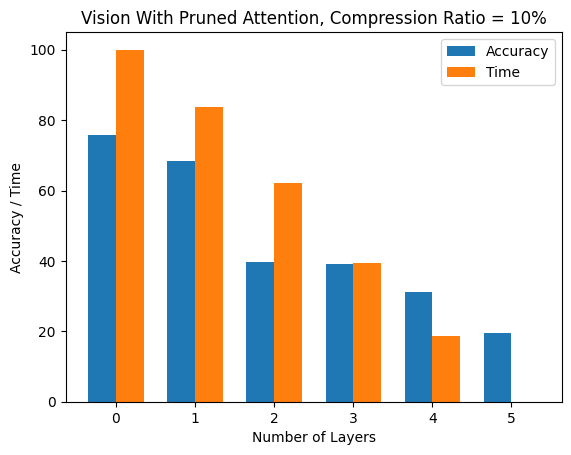

In [273]:
fig, ax = plt.subplots()
x_pos = np.arange(len(n_layers_formatted))
bar_width=0.35

accuracy_bars = ax.bar(x_pos, accuracies_formatted, bar_width, label='Accuracy')
time_bars = ax.bar(x_pos + bar_width, timetaken_formatted2, bar_width, label='Time')
ax.set_ylabel('Accuracy / Time')
ax.set_xlabel('Number of Layers')
ax.set_title('Vision With Pruned Attention, Compression Ratio = 10%')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels([str(i) for i in range(0, len(n_layers_formatted))])
ax.legend()

plt.show()

In [274]:
#### 1- on x axis for compression ratios           

In [275]:
compression_ratios = []
for curr_ratio in data:
    compression_ratios.append(curr_ratio)

In [276]:
accuracies = []
timetaken = []
# For compression of 10%
n_layers=[]
for layer in data['0.7000000000000001']:
    n_layers.append(layer)
    accuracies.append(data['0.7000000000000001'][layer]['perf']['top-5'])
    timetaken.append(data['0.7000000000000001'][layer]['perf']['text_enc_time'])

In [277]:
n_layers_formatted=[int(x) for x in n_layers]
accuracies_formatted=[float(x) for x in accuracies]
timetaken_formatted=[float(x) for x in timetaken]

In [278]:
timetaken_formatted2 = []
for x in timetaken_formatted:
    scaled_time=((x-min(timetaken_formatted))/(max(timetaken_formatted)-min(timetaken_formatted)))*100
    timetaken_formatted2.append(scaled_time)

In [279]:
timetaken_formatted2 = np.array(timetaken_formatted2)
accuracies_formatted =np.array(accuracies_formatted)
n_layers_formatted = np.array(n_layers_formatted)

In [280]:
timetaken_formatted2

array([100.        ,  78.91940366,  58.35227669,  39.33643646,
        18.58405303,   0.        ])

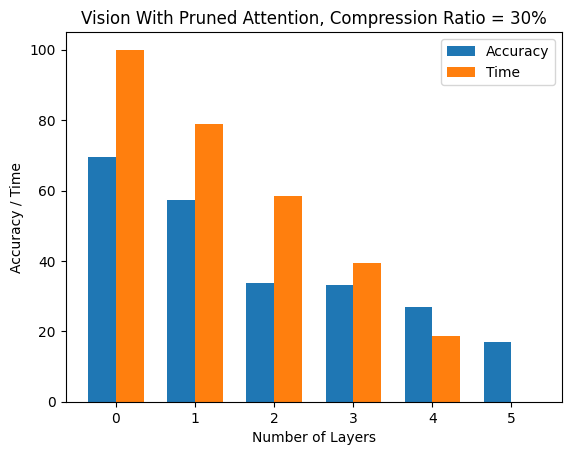

In [281]:
fig, ax = plt.subplots()
x_pos = np.arange(len(n_layers_formatted))
bar_width=0.35

accuracy_bars = ax.bar(x_pos, accuracies_formatted, bar_width, label='Accuracy')
time_bars = ax.bar(x_pos + bar_width, timetaken_formatted2, bar_width, label='Time')
ax.set_ylabel('Accuracy / Time')
ax.set_xlabel('Number of Layers')
ax.set_title('Vision With Pruned Attention, Compression Ratio = 30%')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels([str(i) for i in range(0, len(n_layers_formatted))])
ax.legend()

plt.show()

In [282]:
compression_ratios = []
for curr_ratio in data:
    compression_ratios.append(curr_ratio)

In [283]:
accuracies = []
timetaken = []
# For compression of 10%
n_layers=[]
for layer in data['0.5']:
    n_layers.append(layer)
    accuracies.append(data['0.5'][layer]['perf']['top-5'])
    timetaken.append(data['0.5'][layer]['perf']['text_enc_time'])

In [284]:
n_layers_formatted=[int(x) for x in n_layers]
accuracies_formatted=[float(x) for x in accuracies]
timetaken_formatted=[float(x) for x in timetaken]

In [285]:
timetaken_formatted2 = []
for x in timetaken_formatted:
    scaled_time=((x-min(timetaken_formatted))/(max(timetaken_formatted)-min(timetaken_formatted)))*100
    timetaken_formatted2.append(scaled_time)

In [286]:
timetaken_formatted2 = np.array(timetaken_formatted2)
accuracies_formatted =np.array(accuracies_formatted)
n_layers_formatted = np.array(n_layers_formatted)

In [287]:
timetaken_formatted2

array([100.        ,  79.47775277,  60.41245646,  40.04871043,
        21.1924456 ,   0.        ])

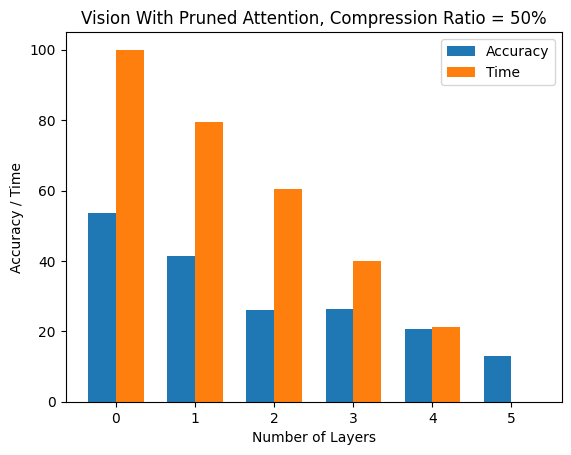

In [288]:
fig, ax = plt.subplots()
x_pos = np.arange(len(n_layers_formatted))
bar_width=0.35

accuracy_bars = ax.bar(x_pos, accuracies_formatted, bar_width, label='Accuracy')
time_bars = ax.bar(x_pos + bar_width, timetaken_formatted2, bar_width, label='Time')
ax.set_ylabel('Accuracy / Time')
ax.set_xlabel('Number of Layers')
ax.set_title('Vision With Pruned Attention, Compression Ratio = 50%')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels([str(i) for i in range(0, len(n_layers_formatted))])
ax.legend()

plt.show()